In [ ]:
!pip install plotly

!pip install seaborn
!pip install nltk
!pip install gensim
!pip install yellowbrick


You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import nltk 

import gensim
import gc
import string
import re
import yellowbrick
#import plotly.plotly as py
import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots

#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




pd.set_option('display.max_colwidth', -1)
pd.options.display.max_columns = None

/opt/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## ***Information About the columns present in the Data***

1. There are 12 columns in the data they are as follows:
    * ***Job_title*** : The title of job which you are applying to
    * ***Company*** : Company name
    * ***State/City*** : State/City in which the companies job posting is listed.
    * ***Min_Salary*** : Minimum yearly salary in USD.
    * ***Max_Salary*** : Maximum yearly salary in USD.
    * ***Job_Desc*** : The job description which included skills,requirements,etc
    * ***Industry*** : The industry in which the company works.
    * ***Date_posted*** : The date  on which the job was posted on glassdoor
    * ***Valid_until*** : The last date of applying to the job.
    * ***Job_Type*** : Type of job full-time , part-time,etc.
2. All the data collected is about job lisitng for Data Scientist and related roles. The job listings are scraped from ***Glassdoor.co.in***

In [ ]:
df_ny = pd.read_csv('Data/Data_Job_NY.csv')
df_sf = pd.read_csv('Data/Data_Job_SF.csv')
df_tx = pd.read_csv('Data/Data_Job_TX.csv')
df_wa = pd.read_csv('Data/Data_Job_WA.csv')
#Concatenating the data files

data_df = pd.concat([df_ny , df_sf , df_tx,df_wa] , axis = 0 , ignore_index = True)


In [ ]:
del df_ny , df_sf , df_tx ,df_wa
gc.collect()

63

In [ ]:
#Beginning the Cleaning and analysis of the data
data_df.head()

Job_title  \
0  Chief Marketing Officer (CMO)                           
1  Registered Nurse                                        
2  Dental Hygienist                                        
3  Senior Salesforce Developer                             
4  DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL ADVOCACY   

                                 Company State           City  Min_Salary  \
0  National Debt Relief                   NY    New York      -1            
1  Queens Boulevard Endoscopy Center      NY    Rego Park     -1            
2  Batista Dental                         NJ    West New York -1            
3  National Debt Relief                   NY    New York       44587        
4  National Advocates for Pregnant Women  NY    New York       125410       

   Max_Salary  \
0 -1            
1 -1            
2 -1            
3  82162        
4  212901       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
data_df.tail(5)

Job_title              Company  \
3319  Data Engineer/Architect with Security Clearance  Booz Allen Hamilton   
3320  Data Engineer with Security Clearance            Booz Allen Hamilton   
3321  Data Engineer, Mid with Security Clearance       Booz Allen Hamilton   
3322  Data Modeler, Senior with Security Clearance     Booz Allen Hamilton   
3323  Data Engineer, Senior with Security Clearance    Booz Allen Hamilton   

     State         City  Min_Salary  Max_Salary  \
3319  VA    McLean       74916       128610       
3320  VA    Arlington    58824       112227       
3321  VA    Herndon      58824       112227       
3322  VA    Springfield  90454       151998       
3323  VA    Herndon      91443       155868       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
data_df.shape

(3324, 12)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 12 columns):
Job_title      3324 non-null object
Company        3324 non-null object
State          3322 non-null object
City           3318 non-null object
Min_Salary     3324 non-null int64
Max_Salary     3324 non-null int64
Job_Desc       3324 non-null object
Industry       2700 non-null object
Rating         2849 non-null float64
Date_Posted    3324 non-null object
Valid_until    3324 non-null object
Job_Type       3324 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 311.8+ KB


In [ ]:
#First let's convert min_salary and max_salary columns to int
data_df['Min_Salary'] = data_df['Min_Salary'].apply(lambda x : int(x))
data_df['Max_Salary'] =data_df['Max_Salary'].apply(lambda x : int(x))

In [ ]:
#Extracting date and day from Date_Posted : data is the format y-m-d
import calendar
data_df['Month'] = data_df['Date_Posted'].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])]) 
#data_df['Month'] = data_df['Month'].apply(lambda x : calendar.month_abbr[int(x)])


In [ ]:
def Convert_to_Day(x):
    sl = x.split('-')
    
    return calendar.day_abbr[int(calendar.weekday(int(sl[0]) , int(sl[1]) , int(sl[2])))]

data_df['Day'] = data_df['Date_Posted'].apply(lambda x : Convert_to_Day(x))

In [ ]:
#While collecting the data if no salary is found I replaced the value by -1 so lets store that data in different data frame
index_missing = data_df[(data_df['Min_Salary'] == -1)].index
test_df = data_df.iloc[index_missing, :].reset_index(drop = True)
data_df.drop(index_missing , axis = 0 , inplace = True)
data_df = data_df.reset_index(drop = True)
#We will use this data as our test set.

In [ ]:
#Now that we have train and test set there are duplicates in the data becasue our scraper was not perfect and could havea assimilated multiple entries
cols = [col for col in data_df.columns if col not in ['Day' , 'Month']]
#For training data 
train_series = data_df.duplicated(cols , keep = 'first')
data_df =data_df[~train_series].reset_index(drop = True)
test_series = test_df.duplicated(cols , keep = 'first')
test_df = test_df[~test_series].reset_index(drop = True)

##  Exploratory Data Analysis

* It's time to explore features of the data and get our hands dirty.



## State Column

* United States of America has 50 states but we have collected data mainly by using city search like San Fransico, New York ,etc
* Here is a map of states in USA

![map](http://ontheworldmap.com/usa/us-state-abbreviations-map-max.jpg)


In [ ]:
#Unique States

print(data_df['State'].unique())

['NY' 'NJ' 'CA' 'KY' 'TX' 'TN' 'VA' 'MD' 'DC' 'NC']


In [ ]:
#Let's explore the top 5 cites in which most job lisitngs are there
for state in data_df['State'].unique():
    print(f"State of {state}")
    print(data_df[data_df['State'] == state]['City'].value_counts()[:5])



State of NY
New York         8
Staten Island    1
Maspeth          1
Brooklyn         1
Rego Park        1
Name: City, dtype: int64
State of NJ
Jersey City    2
Paramus        1
Name: City, dtype: int64
State of CA
San Francisco          302
South San Francisco    122
Menlo Park             29 
San Mateo              27 
Redwood City           20 
Name: City, dtype: int64
State of KY
Florence    1
Name: City, dtype: int64
State of TX
Austin         132
Dallas         79 
Houston        67 
Irving         40 
San Antonio    40 
Name: City, dtype: int64
State of TN
Chennai    1
Name: City, dtype: int64
State of VA
Arlington      77
McLean         50
Reston         35
Springfield    34
Chantilly      29
Name: City, dtype: int64
State of MD
Gaithersburg     41
Rockville        36
Silver Spring    25
College Park     23
Bethesda         20
Name: City, dtype: int64
State of DC
Washington    154
Name: City, dtype: int64
State of NC
Raleigh    1
Name: City, dtype: int64


* No Doubt Silicon valley Hub, San Fransico is dominating with most number of job openings

In [ ]:
#Pie Chart of CA and NY

max_state = ['CA' , 'TX']
fig = make_subplots(rows = 1 , cols =2 , specs=[[{'type':'domain'}, {'type':'domain'}]])
for i,state in enumerate(max_state,1):
    cities = data_df[data_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = data_df[data_df["State"] == state]['City'].value_counts()[:5].to_list()
    fig.add_trace(go.Pie(labels = cities ,values = counts  ,name = state),1,i)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="States with most number of jobs",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text= 'CA', x=0.20, y=0.5, font_size=25, showarrow=False),
                 dict(text='TX', x=0.82, y=0.5, font_size=25, showarrow=False)])
fig.show()

In [ ]:
#Dropping the states where value of number of jobs will be one as they'll be outliers
index = data_df[(data_df['State'] =='NC') | (data_df['State'] =='TN') | (data_df['State'] =='KY')].index
data_df.drop(index , inplace = True)

In [ ]:
#Let's the avg minimal salaries for states 
import numpy as np
states = data_df['State'].unique().tolist()
fig = go.Figure()
min_sal =  data_df.groupby('State')['Min_Salary']
max_sal =  data_df.groupby('State')['Max_Salary']
fig.add_trace(go.Bar(x = states,
                    y = min_sal.mean(),
                    name = 'Min Salary' , marker_color = 'Magenta'))

fig.add_trace(go.Bar(x = states,
                    y = max_sal.mean(),
                    name = 'Max Salary' , marker_color = 'SkyBlue'))
fig.update_layout(template = 'ggplot2', barmode = 'group')
fig.show()


## What's the Inference about salaries ?
* Minimal Average salary for NY is greater CA & DC, that can be because of the less data points for NY state indicating it is an outlier.
* Both DC and California offer almost the same average salaries both minimal and maximal.

In [ ]:
#Let's see avg minimal salaries according to top  5 cities 
states = ["CA",'TX','DC']
fig = make_subplots(rows = 3 , cols = 1,specs = [[{"type": "xy"}],[{"type": "xy"}],[{"type": "xy"}]])
colors = ['#2e9dd4' ,'#e76969' ,'#4fd882' ,'#f22dea' , '#e7468f']
for i,state in enumerate(states,1):

    cities = data_df[data_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    avg_min_sals = []
    for city in cities:
        

        avg_min_sals.append(int(data_df[data_df['City'] == city]['Min_Salary'].mean()))
    fig.add_trace(go.Bar(x = cities , y = avg_min_sals  ,marker_color = colors ,name = state),i,1)
fig.update_layout(template = 'ggplot2' , title = "Average Minimal Salaries per city in states with most number of Jobs")
fig.show()




* The city with the highest avg minimal salary is South San Fransico.

In [ ]:
#Job Types in States with Max number of Jobs
for state in states:
    print(f"Type of Jobs in state of {state}")
    print(data_df[data_df['State'] == state]['Job_Type'].value_counts())

Type of Jobs in state of CA
FULL_TIME     616
PART_TIME     8  
OTHER         4  
CONTRACTOR    4  
Name: Job_Type, dtype: int64
Type of Jobs in state of TX
FULL_TIME     453
OTHER         7  
PART_TIME     6  
CONTRACTOR    2  
TEMPORARY     1  
Name: Job_Type, dtype: int64
Type of Jobs in state of DC
FULL_TIME    146
PART_TIME    7  
OTHER        1  
Name: Job_Type, dtype: int64


In [ ]:
#Let's see the day on which most number of jobs are posted
day_fig = go.Figure([go.Bar(x = data_df['Day'].value_counts().index.to_list() ,
                    y = data_df['Day'].value_counts().to_list() , marker_color = 'skyblue')])
day_fig.update_layout(template = 'ggplot2' , title = 'Days with max number of jobs')

* Apparently Friday is the day in which max number of jobs were posted.

## Exploring Industries

* Data science,Machine Learning,Deep Learning is being used in varied fields from natural science all the way to finance and banking sectors.
* Naturally, our collected data will contain some of the industries but may not contain all of them.

In [ ]:
#Now's  let's explore the industry column
#This column has Nan Values

ind = data_df[~data_df['Industry'].isnull()]
print(f"Number of Unique Industries : {ind.Industry.nunique()}")

Number of Unique Industries : 23


In [ ]:
ind.Industry.value_counts()

Information Technology                476
Business Services                     309
Biotech & Pharmaceuticals             259
Aerospace & Defense                   126
Finance                               94 
Health Care                           78 
Government                            78 
Education                             53 
Manufacturing                         34 
Media                                 27 
Retail                                26 
Accounting & Legal                    25 
Insurance                             25 
Oil, Gas, Energy & Utilities          24 
Transportation & Logistics            8  
Construction, Repair & Maintenance    6  
Non-Profit                            6  
Telecommunications                    5  
Real Estate                           4  
Consumer Services                     4  
Restaurants, Bars & Food Services     3  
Arts, Entertainment & Recreation      2  
Agriculture & Forestry                1  
Name: Industry, dtype: int64

In [ ]:
#top 8 industries with max number of jobs

fig = go.Figure()
fig.add_traces(go.Pie(values = ind.Industry.value_counts()[:8].to_list(),
                    labels= ind.Industry.value_counts()[:8].index.to_list(),
                    name = 'Industry',textposition = 'inside' , textinfo = 'percent+label'))
fig.update_layout(template = 'plotly_white',title = 'Industries with most number of Data Science Related jobs' )
fig.show()

* As expected industries which come under IT sector have max number of jobs followed by industries which come under Business services.
* Though one intersting for me was Biotech requires more amount data science related individual than finance atleast for this data set.

In [ ]:
#Let's see which industries dominate the states 
for state in ind.State.unique():
    print(f"State of {state}")
    print(ind[ind['State'] == state]['Industry'].value_counts()[:8])




State of NY
Finance                               3
Health Care                           2
Construction, Repair & Maintenance    2
Information Technology                1
Retail                                1
Biotech & Pharmaceuticals             1
Telecommunications                    1
Name: Industry, dtype: int64
State of NJ
Health Care    3
Name: Industry, dtype: int64
State of CA
Information Technology       205
Biotech & Pharmaceuticals    176
Business Services            30 
Finance                      27 
Health Care                  24 
Manufacturing                21 
Retail                       17 
Government                   13 
Name: Industry, dtype: int64
State of TX
Information Technology          141
Business Services               76 
Health Care                     44 
Finance                         43 
Education                       31 
Government                      17 
Oil, Gas, Energy & Utilities    16 
Insurance                       15 
Name: Industry, 

* State of DC is dominated by Business Service and the state of Maryland by Biotech industry atleast for this collected data.

In [ ]:
#Lets take a look at minimal average salary for the top 8 industries
fig = go.Figure()
fig.add_trace(go.Bar(x = ind.groupby("Industry")['Min_Salary'].mean().to_list(),
y = ind.groupby("Industry")['Min_Salary'].mean().index.to_list(), marker_color = 'goldenrod',
orientation = 'h' , name = "Min Avg Salary"
))
fig.add_trace(go.Bar(x = ind.groupby("Industry")['Max_Salary'].mean().to_list(),
y = ind.groupby("Industry")['Max_Salary'].mean().index.to_list(), marker_color = 'deepskyblue'
,orientation = 'h' ,name = "Max Avg Salary"))
fig.update_layout( template = 'plotly_dark',
    title = 'Minimal And Maximal Average Annual Salaries according to industries' ,barmode = 'group')
fig.show()

* Agriculture and Forestry is an outlier if because in whole of the data there is only one example of it.
* IT industry pays the best avg minimal and maximal yearly salary.

In [ ]:
#Now let's explore companies 

print(f"Number of Unique Company Names : {data_df['Company'].nunique()}")


Number of Unique Company Names : 959


In [ ]:
# Companies which have most number of job postings

fig = go.Figure()
fig.add_trace(go.Bar(y = data_df['Company'].value_counts()[:20].to_list(),
x= data_df['Company'].value_counts()[:20].index.to_list(),
marker_color = 'deepskyblue' , name = "Company"))
fig.update_layout(title= 'Companies with Max Number of Job Postings related to data science',
                template = 'plotly_dark')
fig.show()

* According to our data and the above plot **Genentech**,**Booz Allen Hamilton Inc.**,**Amazon** are the companies with the most number of openings.

In [ ]:
#Let's take a look at Avg Minimal and Maximal salaries for companies 
def Plot_Company_salaries(companies,title):
    fig = go.Figure()
    min_sal = []
    max_sal = []
    for company in companies:
        min_sal.append(data_df[data_df['Company'] == company]['Min_Salary'].mean())
        max_sal.append(data_df[data_df['Company'] == company]['Max_Salary'].mean())



    fig.add_trace(go.Bar(x = min_sal ,y = companies , marker_color = 'deepskyblue' 
    , name  = 'Minimal Salary' , orientation = 'h'))
    fig.add_trace(go.Bar( x= max_sal,y = companies , marker_color = 'red' , 
    name = 'Maximal Salary', orientation = 'h'))

    fig.update_layout(title = title,
    barmode = 'group' , template = 'plotly_dark')
    fig.show()
    
    

In [ ]:
#Top 5 companies in CA
states = ['CA' ,'TX' ,'DC' ,'MD' ,'VA']
companies = []
titles = []
for state in states:
    companies.append(data_df[data_df['State'] == state]['Company'].value_counts()[:5].index.to_list())
    titles.append(f'{state} : Minimal And Maximal Annual Average Salaries for top 5 companies')

for i in range(len(states)):
    Plot_Company_salaries(companies[i] , titles[i])


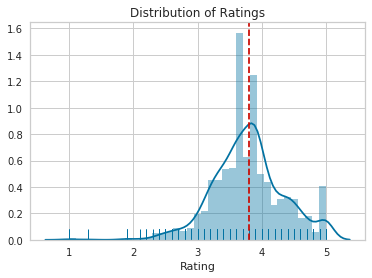

In [ ]:
#Distribution of ratings of companies

ratings =data_df[~data_df['Rating'].isnull()]['Rating']
sns.distplot(ratings,kde = True , rug = True)
plt.axvline(np.median(ratings),color='r', linestyle='--')
plt.grid(True)
plt.title("Distribution of Ratings")
plt.show()

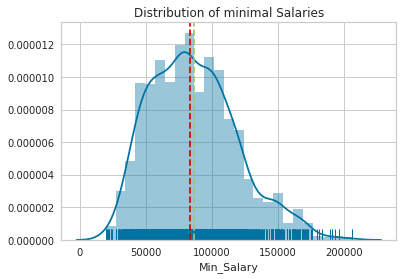

In [ ]:
#Minimal Salaries distribution
sns.distplot(data_df['Min_Salary'] , kde = True , rug = True)
plt.axvline(np.median(data_df['Min_Salary']),color='r', linestyle='--')
plt.axvline(np.mean(data_df['Min_Salary']),color='g', linestyle='--')
plt.grid(True)
plt.title("Distribution of minimal Salaries")
plt.show()



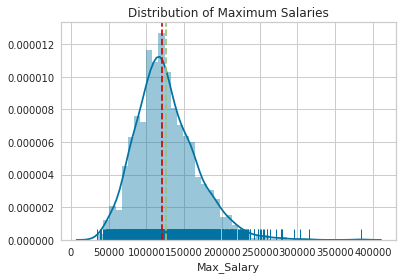

In [ ]:
#Maximal Salaries distribution
sns.distplot(data_df['Max_Salary'] , kde = True , rug = True)
plt.axvline(np.median(data_df['Max_Salary']),color='r', linestyle='--')
plt.axvline(np.mean(data_df['Max_Salary']),color='g', linestyle='--')
plt.grid(True)
#plt.figure(figsize=(100,100))
plt.title("Distribution of Maximum Salaries")
plt.show()

In [ ]:
#unique Job titles
data_df['Job_title'].nunique()

1252

In [ ]:
#Top 8 job titles with max jobs
fig = go.Figure()
fig.add_traces(go.Pie(values = data_df.Job_title.value_counts()[:8].to_list(),
                    labels= data_df.Job_title.value_counts()[:8].index.to_list(),
                    name = 'Job Title',textposition = 'inside' , textinfo = 'percent+label'))
fig.update_layout(template = 'plotly_white',title = 'Job Titles with most number of  jobs',
                showlegend = False )
fig.show()


In [ ]:
titles = ['Data Scientist' ,'Data Analyst' ,'Data Engineer']
min_sal = []
max_sal = []
for title in titles:
    min_sal.append(data_df[data_df['Job_title'] == title]['Min_Salary'].mean())
    max_sal.append(data_df[data_df['Job_title'] == title]['Max_Salary'].mean())

fig = go.Figure()
fig.add_trace(go.Bar(x = min_sal ,y = titles , marker_color = 'deepskyblue',
orientation = 'h' , name = 'Min Salary'))
fig.add_trace(go.Bar(x = max_sal ,y = titles , marker_color = 'magenta',
orientation = 'h' , name = 'Max Salary'))
fig.update_layout(title = 'Annual Avergae Salaries for Job titles having most jobs',
barmode = 'group' ,template = 'plotly_white')
fig.show()

## Extracting Features out of Job Description 

In [ ]:
#Let's See how the description actually looks
x = data_df.Job_Desc[0].replace('\n\n' , '\n')
x = x.split('\n')

print(*x , sep = '\n')

Principle Duties & Responsibilities:
Analyze complex systems and troubleshoot and isolate system issues;
Understand requirements for business users and translate into design specifications, utilizing thorough understanding of the Salesforce platform, Salesforce products and licensing models;
Utilize thorough understanding of application development, project lifecycle, and methodologies and ability to work under tight deadlines and handle multiple detail-oriented tasks;
Apply knowledge of Salesforce developmentand customizations, with APEX, Visual Force, API, Force.com and Workflows, taking into account com best practices, support mechanisms, procedures, and limitations, as well as NDR's unique needs;
Responsible for Salesforce administration, release management and deployment as well as management of Salesforce.com sandboxes, including their integrations;
Design and execute Salesforce.com configuration changes, leveraging the Salesforce interface to sync with internal tracking systems;

##Some Observation on Job Description

Here's what I observe 
* There are '\n' which need to removed
* The descriprion is mostly structred as follows though the order of it can be different

    * Info About Company
    * Qualifications
    * Duties
    * Requirements


In [ ]:
#Let's clean \n
data_df['Job_Desc'] = data_df['Job_Desc'].replace('\n\n' , " " , regex = True)
data_df['Job_Desc'] = data_df['Job_Desc'].replace('\n' , " " , regex = True)

test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n\n' , " " , regex = True)
test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n' , " " , regex = True)
#Let's remove punctuation and Stopwords

from gensim.parsing.preprocessing import remove_stopwords
def Remove_puncutations_stopwords(s):

    s = ''.join([i for i in s if i not in string.punctuation])
    s = remove_stopwords(s)
    return s

data_df['Job_Desc'] = data_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

test_df['Job_Desc'] = test_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

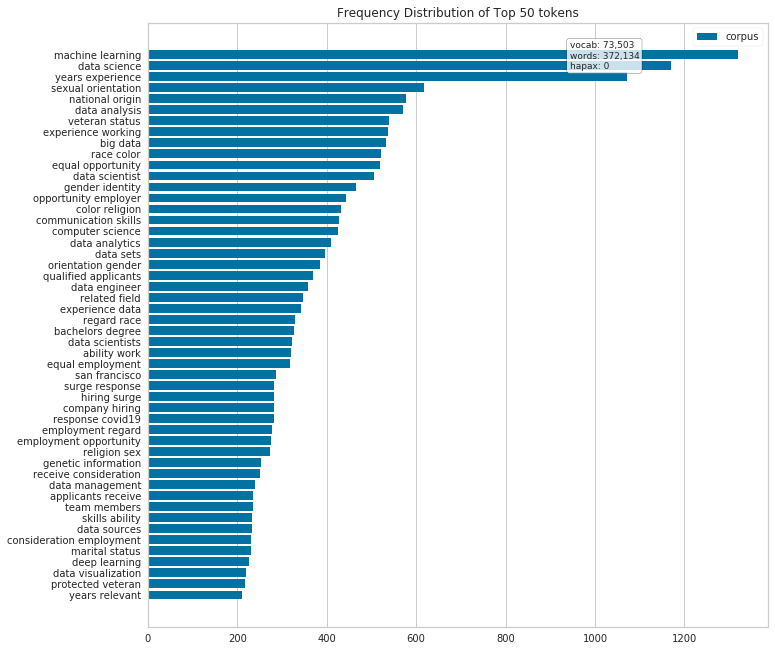

In [ ]:
#Let's try to visualize counts of the tokens
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

vec = CountVectorizer(min_df= 2 , stop_words = 'english' , ngram_range = (2,2))
docs = vec.fit_transform(data_df.Job_Desc)
features = vec.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

* As you can see count vecotrizer mentions the most repeating bi-grams in the Job_Desc. We can create features out it.

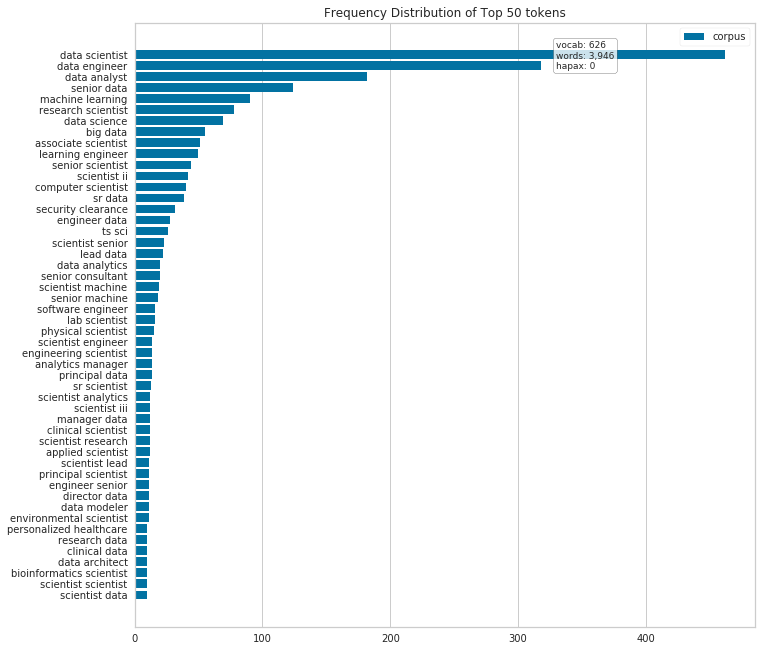

In [ ]:
#Let's test it out for job_titles

vec_title = CountVectorizer(min_df= 2 , stop_words = 'english' , ngram_range = (2,2))
docs_titles = vec.fit_transform(data_df.Job_title)
features_title = vec.get_feature_names()

visualizer = FreqDistVisualizer(features=features_title, orient='h' , size = (800,800))
visualizer.fit(docs_titles)
visualizer.show()

In [ ]:
#Now let's take average of minimal and maximal salary find its median

data_df['avg_sal'] = (data_df['Min_Salary'] + data_df['Max_Salary'])//2


In [ ]:
#Median avg annual salary
print(f"Median average annual salary is {data_df['avg_sal'].median()}")

Median average annual salary is 102378.5


In [ ]:
#Constructing the binary feature which will tell weather the job pays higher or lower than median salary
median_sal = data_df['avg_sal'].median()
data_df['is_higher'] = [1 if i > median_sal else 0 for i in data_df.avg_sal]


In [ ]:
data_df.to_csv("train_data.csv" , index = False)
test_df.to_csv('test_data.csv' , index = False)

